In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV
data = pd.read_csv('Valhalla23.csv')


In [34]:
# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Separar las características y etiquetas
X_train = train_data['Celsius'].values
y_train = train_data['Valks'].values
X_test = test_data['Celsius'].values
y_test = test_data['Valks'].values


In [35]:
# Inicializar parámetros
theta0 = 0
theta1 = 0
alpha = 0.0001  # Tasa de aprendizaje
iterations = 100000  # Número de iteraciones
n = len(X_train)  # Número de muestras

In [36]:
# Función de hipótesis
h0 = lambda x: theta0 + theta1 * x

In [37]:
# Gradiente descendente
for i in range(iterations):
    # Calcular predicciones
    predictions = h0(X_train)

    # Calcular delta para theta0 y theta1
    delta = predictions - y_train
    delta_x = X_train * delta

    # Calcular sumatorias y promedio
    sum_delta = np.sum(delta)
    sum_delta_x = np.sum(delta_x)

    # Actualizar theta0 y theta1
    theta0 -= alpha * (1 / n) * sum_delta
    theta1 -= alpha * (1 / n) * sum_delta_x

In [38]:
# Realizar predicciones en el conjunto de prueba
y_pred = h0(X_test)

In [39]:
# Función de Costo
def costo(X, y, theta0, theta1):
    m = len(y)
    predictions = theta0 + theta1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Calcular el costo para el conjunto de prueba
test_cost = costo(X_test, y_test, theta0, theta1)

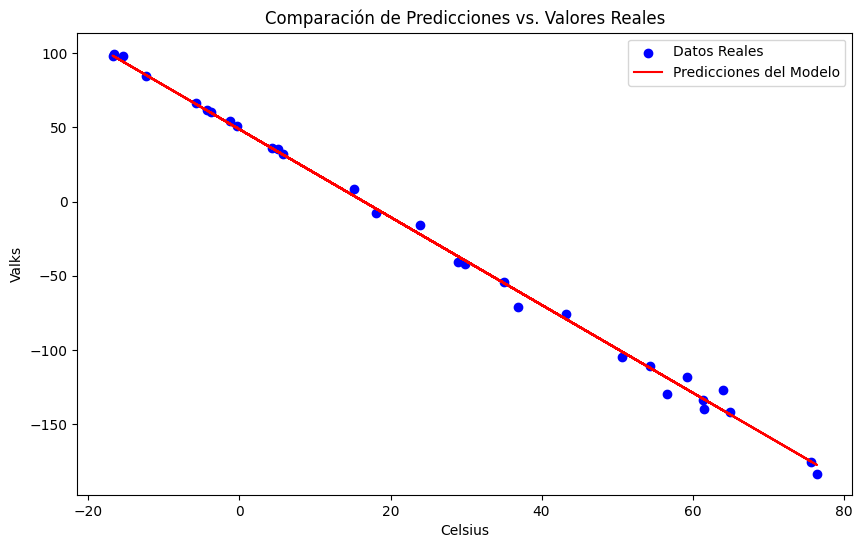

Parámetros finales: theta0 = 48.74905704048726, theta1 = -2.9587598431875524
Función de costo en prueba: 12.199436613058218


In [40]:
# Gráficar Resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones del Modelo')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.show()

# Mostrar resultados
print(f"Parámetros finales: theta0 = {theta0}, theta1 = {theta1}")
print(f"Función de costo en prueba: {test_cost}")
